In [1]:
!pip install kaggle

Dataset URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment
License(s): apache-2.0
  0% 0.00/84.1k [00:00<?, ?B/s]
100% 84.1k/84.1k [00:00<00:00, 44.3MB/s]
Archive:  /content/air-quality-and-pollution-assessment.zip
  inflating: updated_pollution_dataset.csv  


Data loader

In [13]:
import pandas as pd

def loader():
  !rm air-quality-and-pollution-assessment.zip && rm updated_pollution_dataset.csv
  !kaggle datasets download mujtabamatin/air-quality-and-pollution-assessment
  !unzip /content/air-quality-and-pollution-assessment.zip
  return pd.read_csv('updated_pollution_dataset.csv')

df = loader()

Dataset URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment
License(s): apache-2.0
  0% 0.00/84.1k [00:00<?, ?B/s]
100% 84.1k/84.1k [00:00<00:00, 81.1MB/s]
Archive:  /content/air-quality-and-pollution-assessment.zip
  inflating: updated_pollution_dataset.csv  


Описание датасета:

*   Temperature (°C): Средняя температура по региону.
*   Humidity (%): Относительная влажность воздуха, зафиксированная в регионе.
*   PM2.5 Concentration (µg/m³): Уровни содержания мелких частиц.
*   PM10 Concentration (µg/m³): Уровни содержания крупных твердых частиц.
*   NO2 Concentration (ppb): Уровни содержания диоксида азота.
*   SO2 Concentration (ppb): Уровни содержания диоксида серы.
*   CO Concentration (ppm): Уровень окиси углерода.
*   Proximity to Industrial Areas (km): Расстояние до ближайшей промышленной зоны.
*   Population Density (people/km²): Количество людей на квадратный километр в регионе.

Классы (Air Quality Levels):
*   Good
*   Moderate
*   Poor
*   Hazardous

Размер: 5000 записей

Статистика и визуализация:

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Распределение признаков:

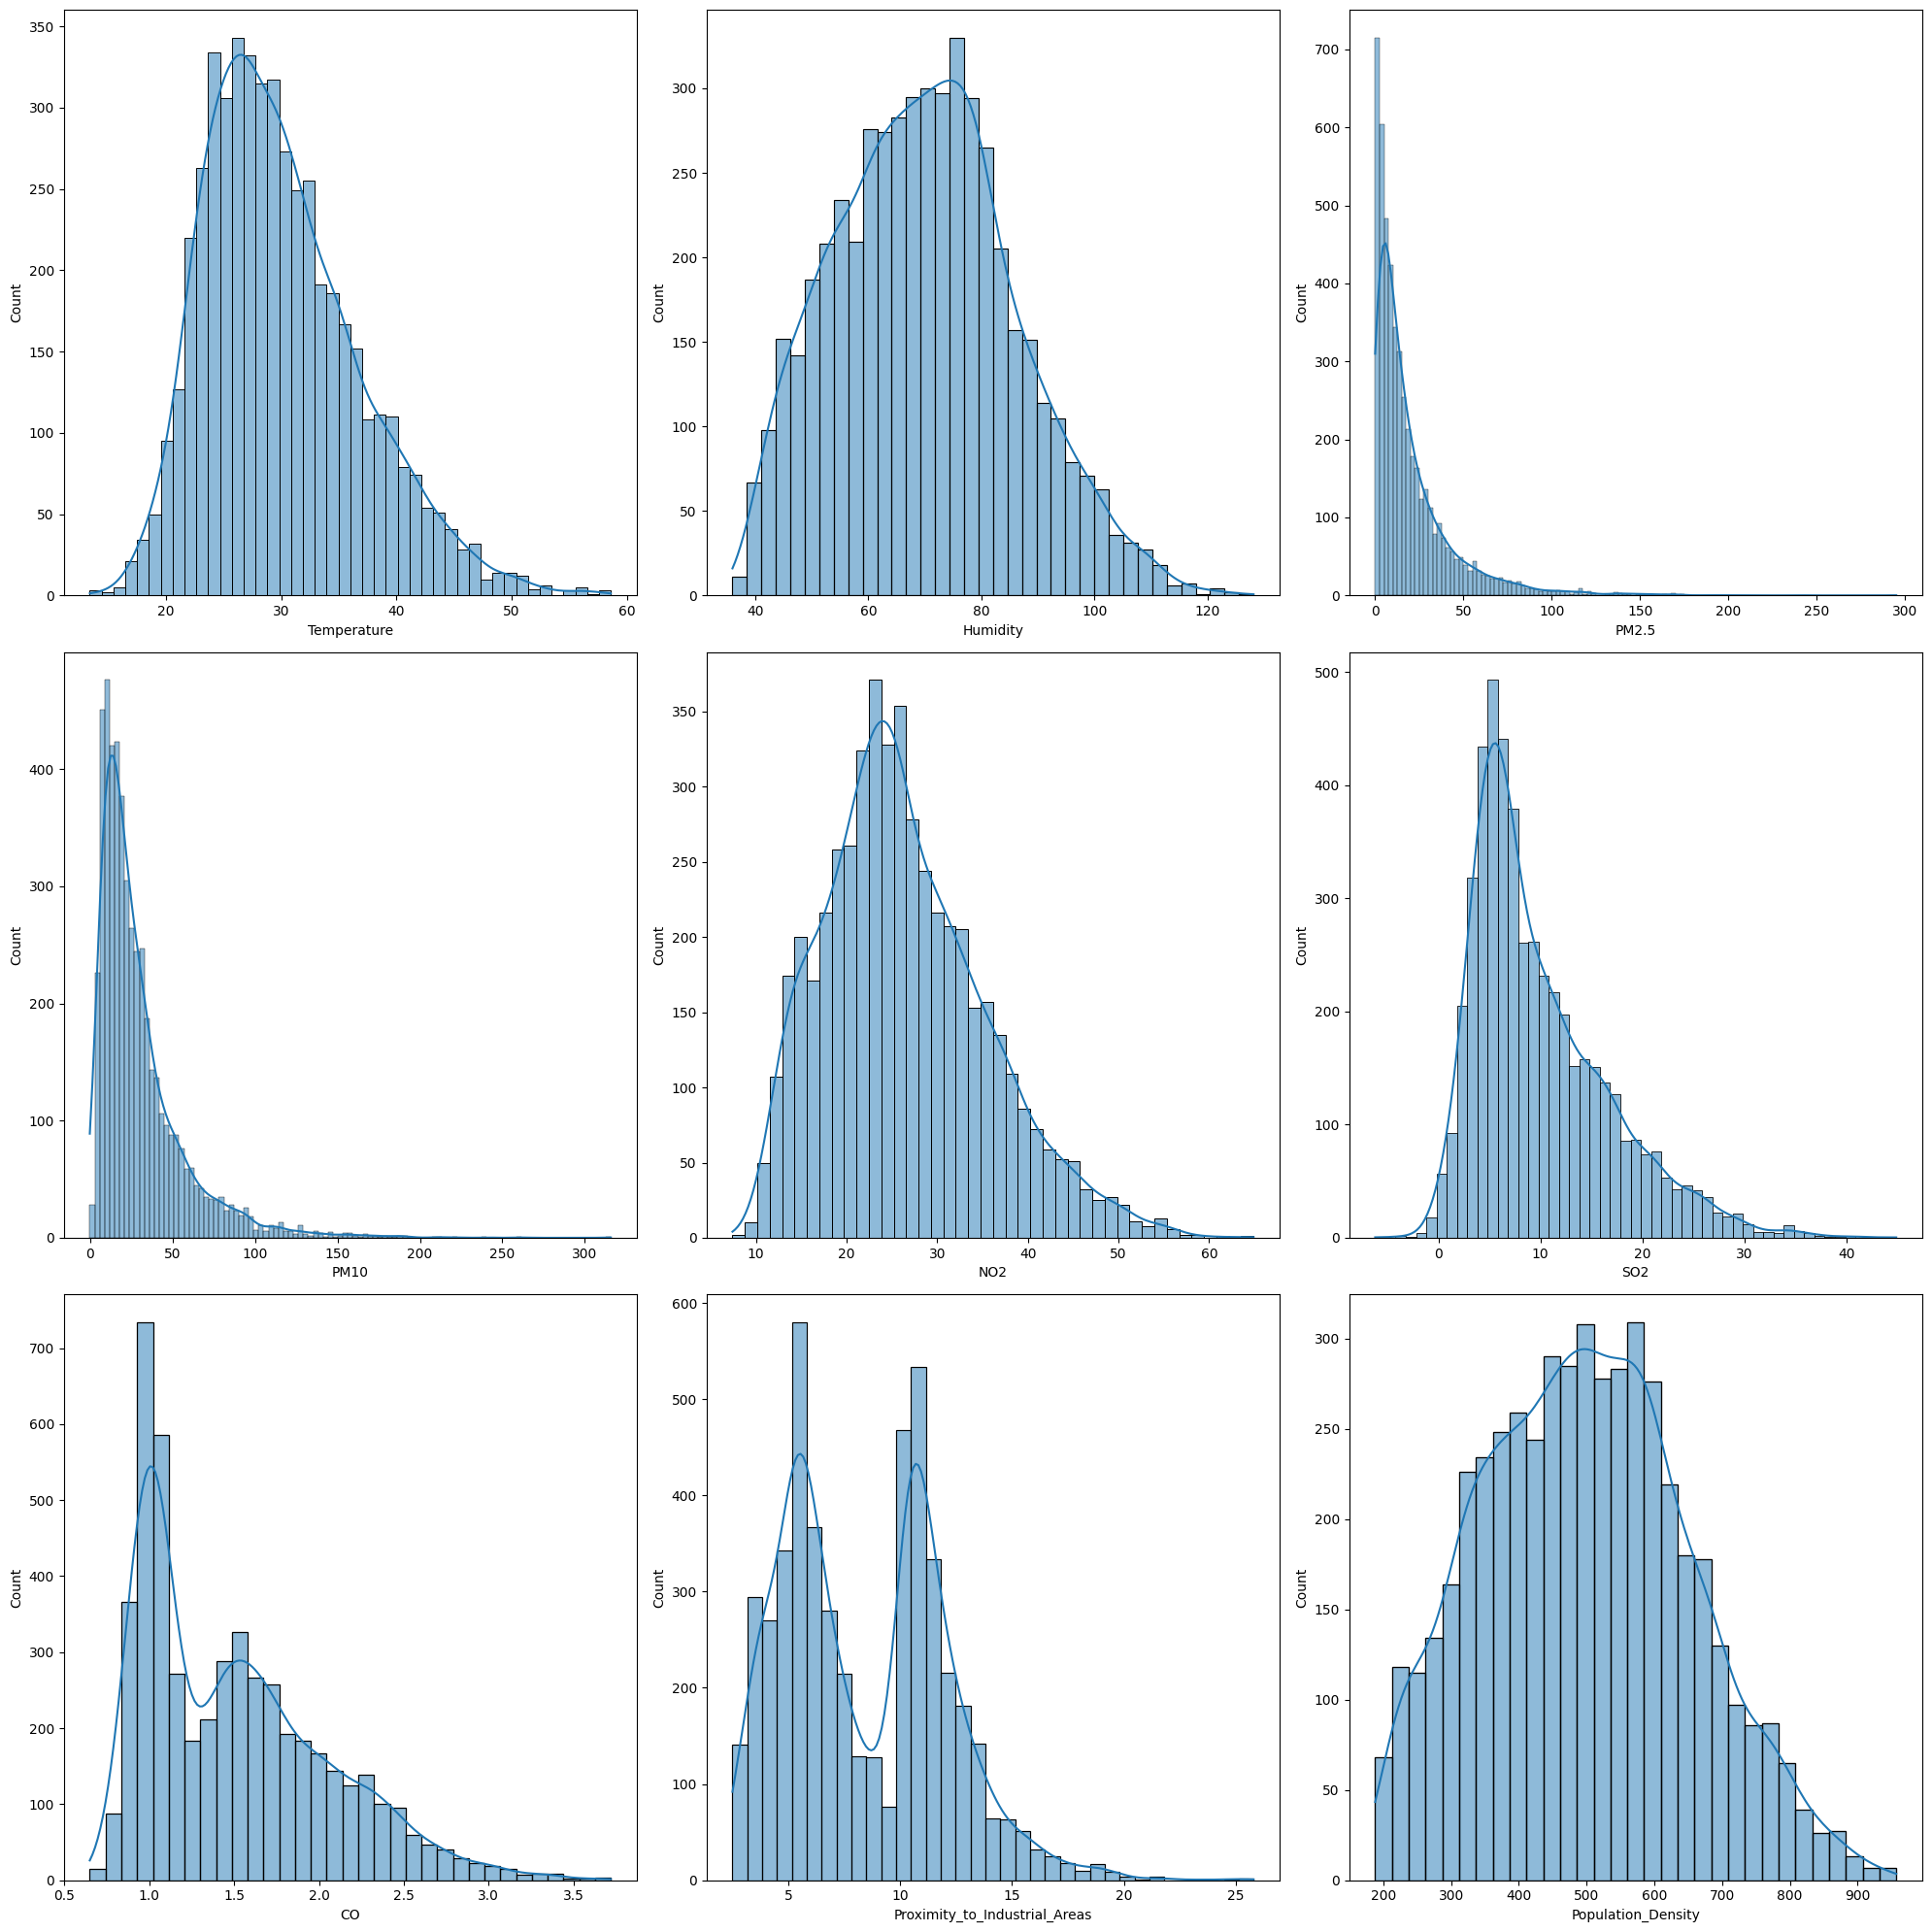

In [17]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

**Температура**
*  Распределение температуры выглядит нормальным, но слегка смещенным вправо.
*  Большинство значений температуры сосредоточены в диапазоне от 20°C до 35°C.
Наблюдается меньшее количество случаев повышения температуры ниже 15°C и выше 45°C, что указывает на выбросы или редкие явления.

**Влажность**
*  Влажность также имеет небольшой перекос вправо.
*  Большинство значений влажности находятся в диапазоне от 50% до 80%.
*  Очень высокие значения влажности (выше 100%) встречаются относительно редко.

**PM2,5**
*  Уровни PM2,5 имеют сильно неравномерное распределение с концентрацией значений в нижнем диапазоне.
*  Большинство значений PM2,5 находятся в пределах от 0 до 50 мкг/м3, что в большинстве случаев указывает на более низкие уровни загрязнения.
*  Однако некоторые экстремальные значения, превышающие 100 и более, указывают на спорадические периоды высокого загрязнения.

**PM10**
*  Как и в случае с PM2,5, значения PM10 имеют смещенное вправо распределение.
*  Большинство значений PM10 находятся в диапазоне от 0 до 50 мкг/м3.
*  Некоторые значения достигают 300, что указывает на редкие, но серьезные случаи загрязнения.

**NO2 (диоксид азота)**
*  Большинство значений NO2 находятся в диапазоне от 10 до 40 мкг/м3.
*  Очень высокие уровни (>50) встречаются редко, что указывает на всплески загрязнения.

**CO (монооксид углерода)**
*  Распределение CO смещено вправо.
*  Большинство значений CO находятся в диапазоне от 1,0 до 1,5.
В меньшем числе случаев наблюдаются более высокие значения, превышающие 2,5, что отражает случайные скачки уровня CO.
*  Асимметрия указывает на случайные случаи загрязнения, но преобладание низких уровней CO.

**Близость к промышленным районам**
*  Распределение этой переменной, по-видимому, бимодальное (два пика).
*  Один пик приходится на расстояние около 5 единиц, а другой - около 10 единиц.
*  Такое бимодальное поведение может указывать на наличие отдельных кластеров, возможно, разделяющих районы, расположенные близко или умеренно далеко от промышленных зон.
*  Очень немногие значения превышают 15 единиц, что позволяет предположить, что большинство точек данных представляют местоположения, расположенные относительно близко к промышленным зонам.

**Плотность населения**
*  Плотность населения соответствует нормальному распределению с небольшой асимметрией.
*  Значения находятся в диапазоне от 400 до 600, что указывает на типичную плотность населения для большинства регионов в наборе данных.
*  Распределение затухает для более низких плотностей (<300) и более высоких плотностей (>800)

Распределение целевой переменной:

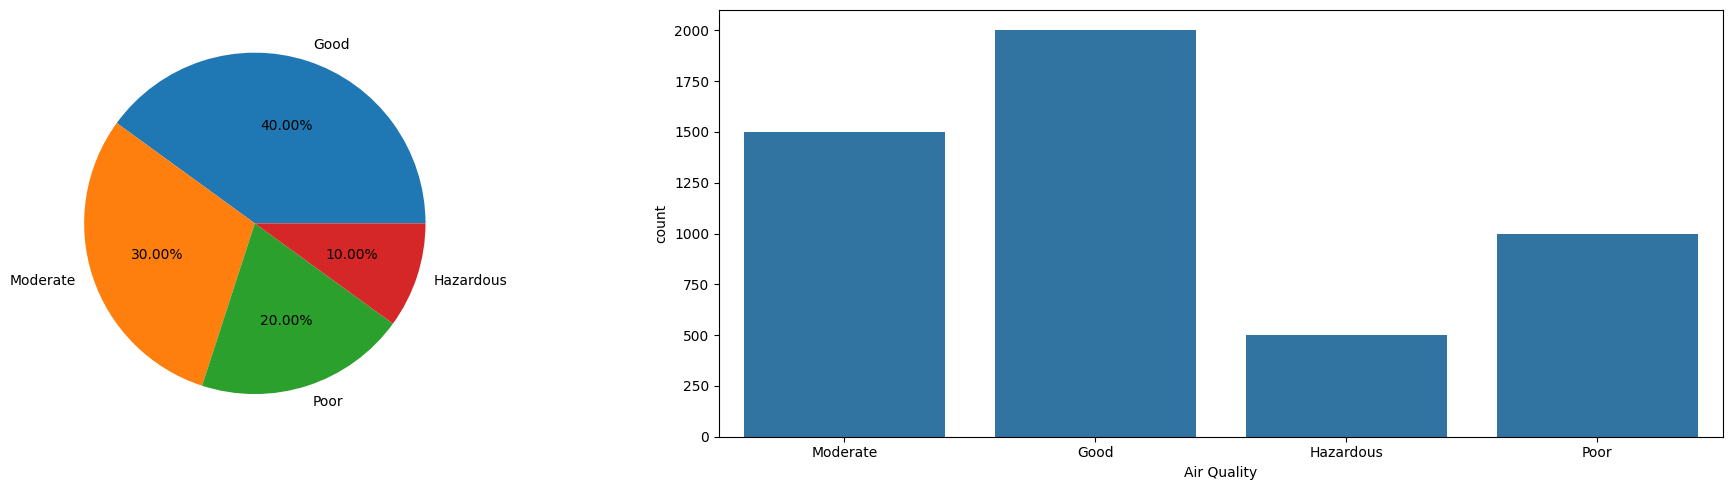

In [18]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

tdf=df['Air Quality'].value_counts().reset_index()
ax[0].pie(tdf['count'],labels=tdf[col],autopct='%.2f%%')
ax[0].set_aspect('equal')
sns.countplot(data=df,x=col,ax=ax[1])
plt.tight_layout()
plt.show()

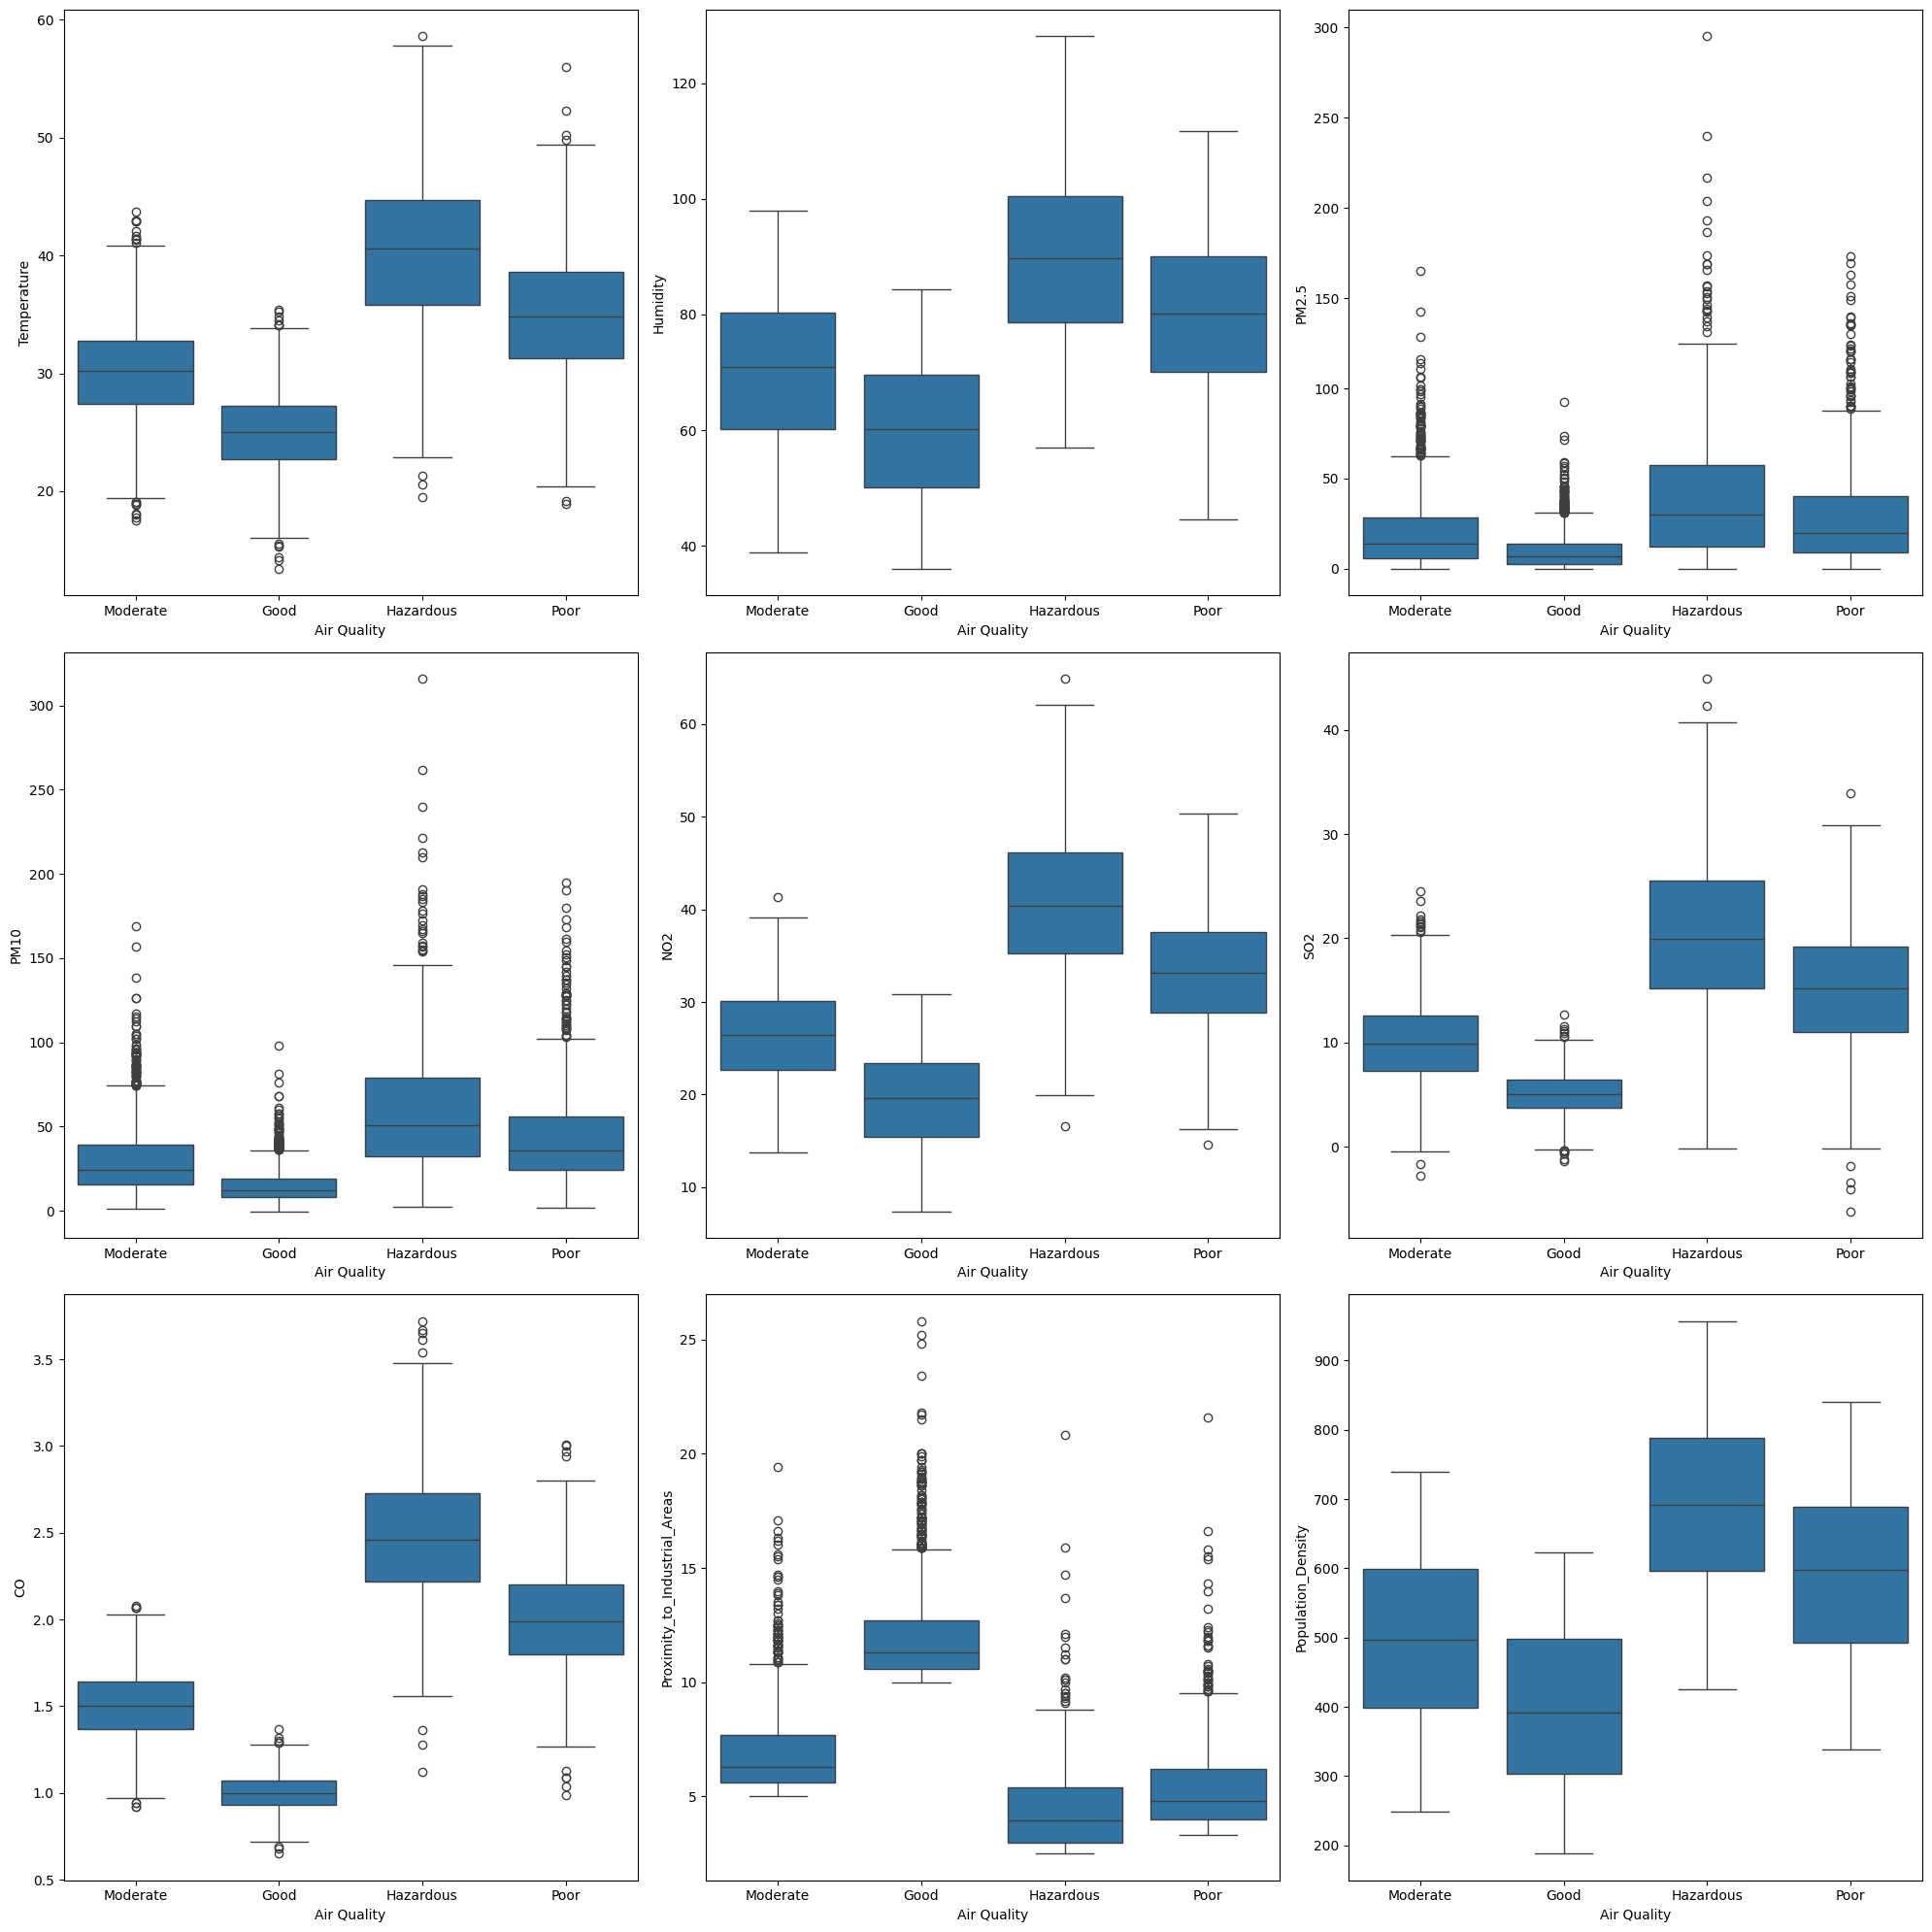

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
plt.show()

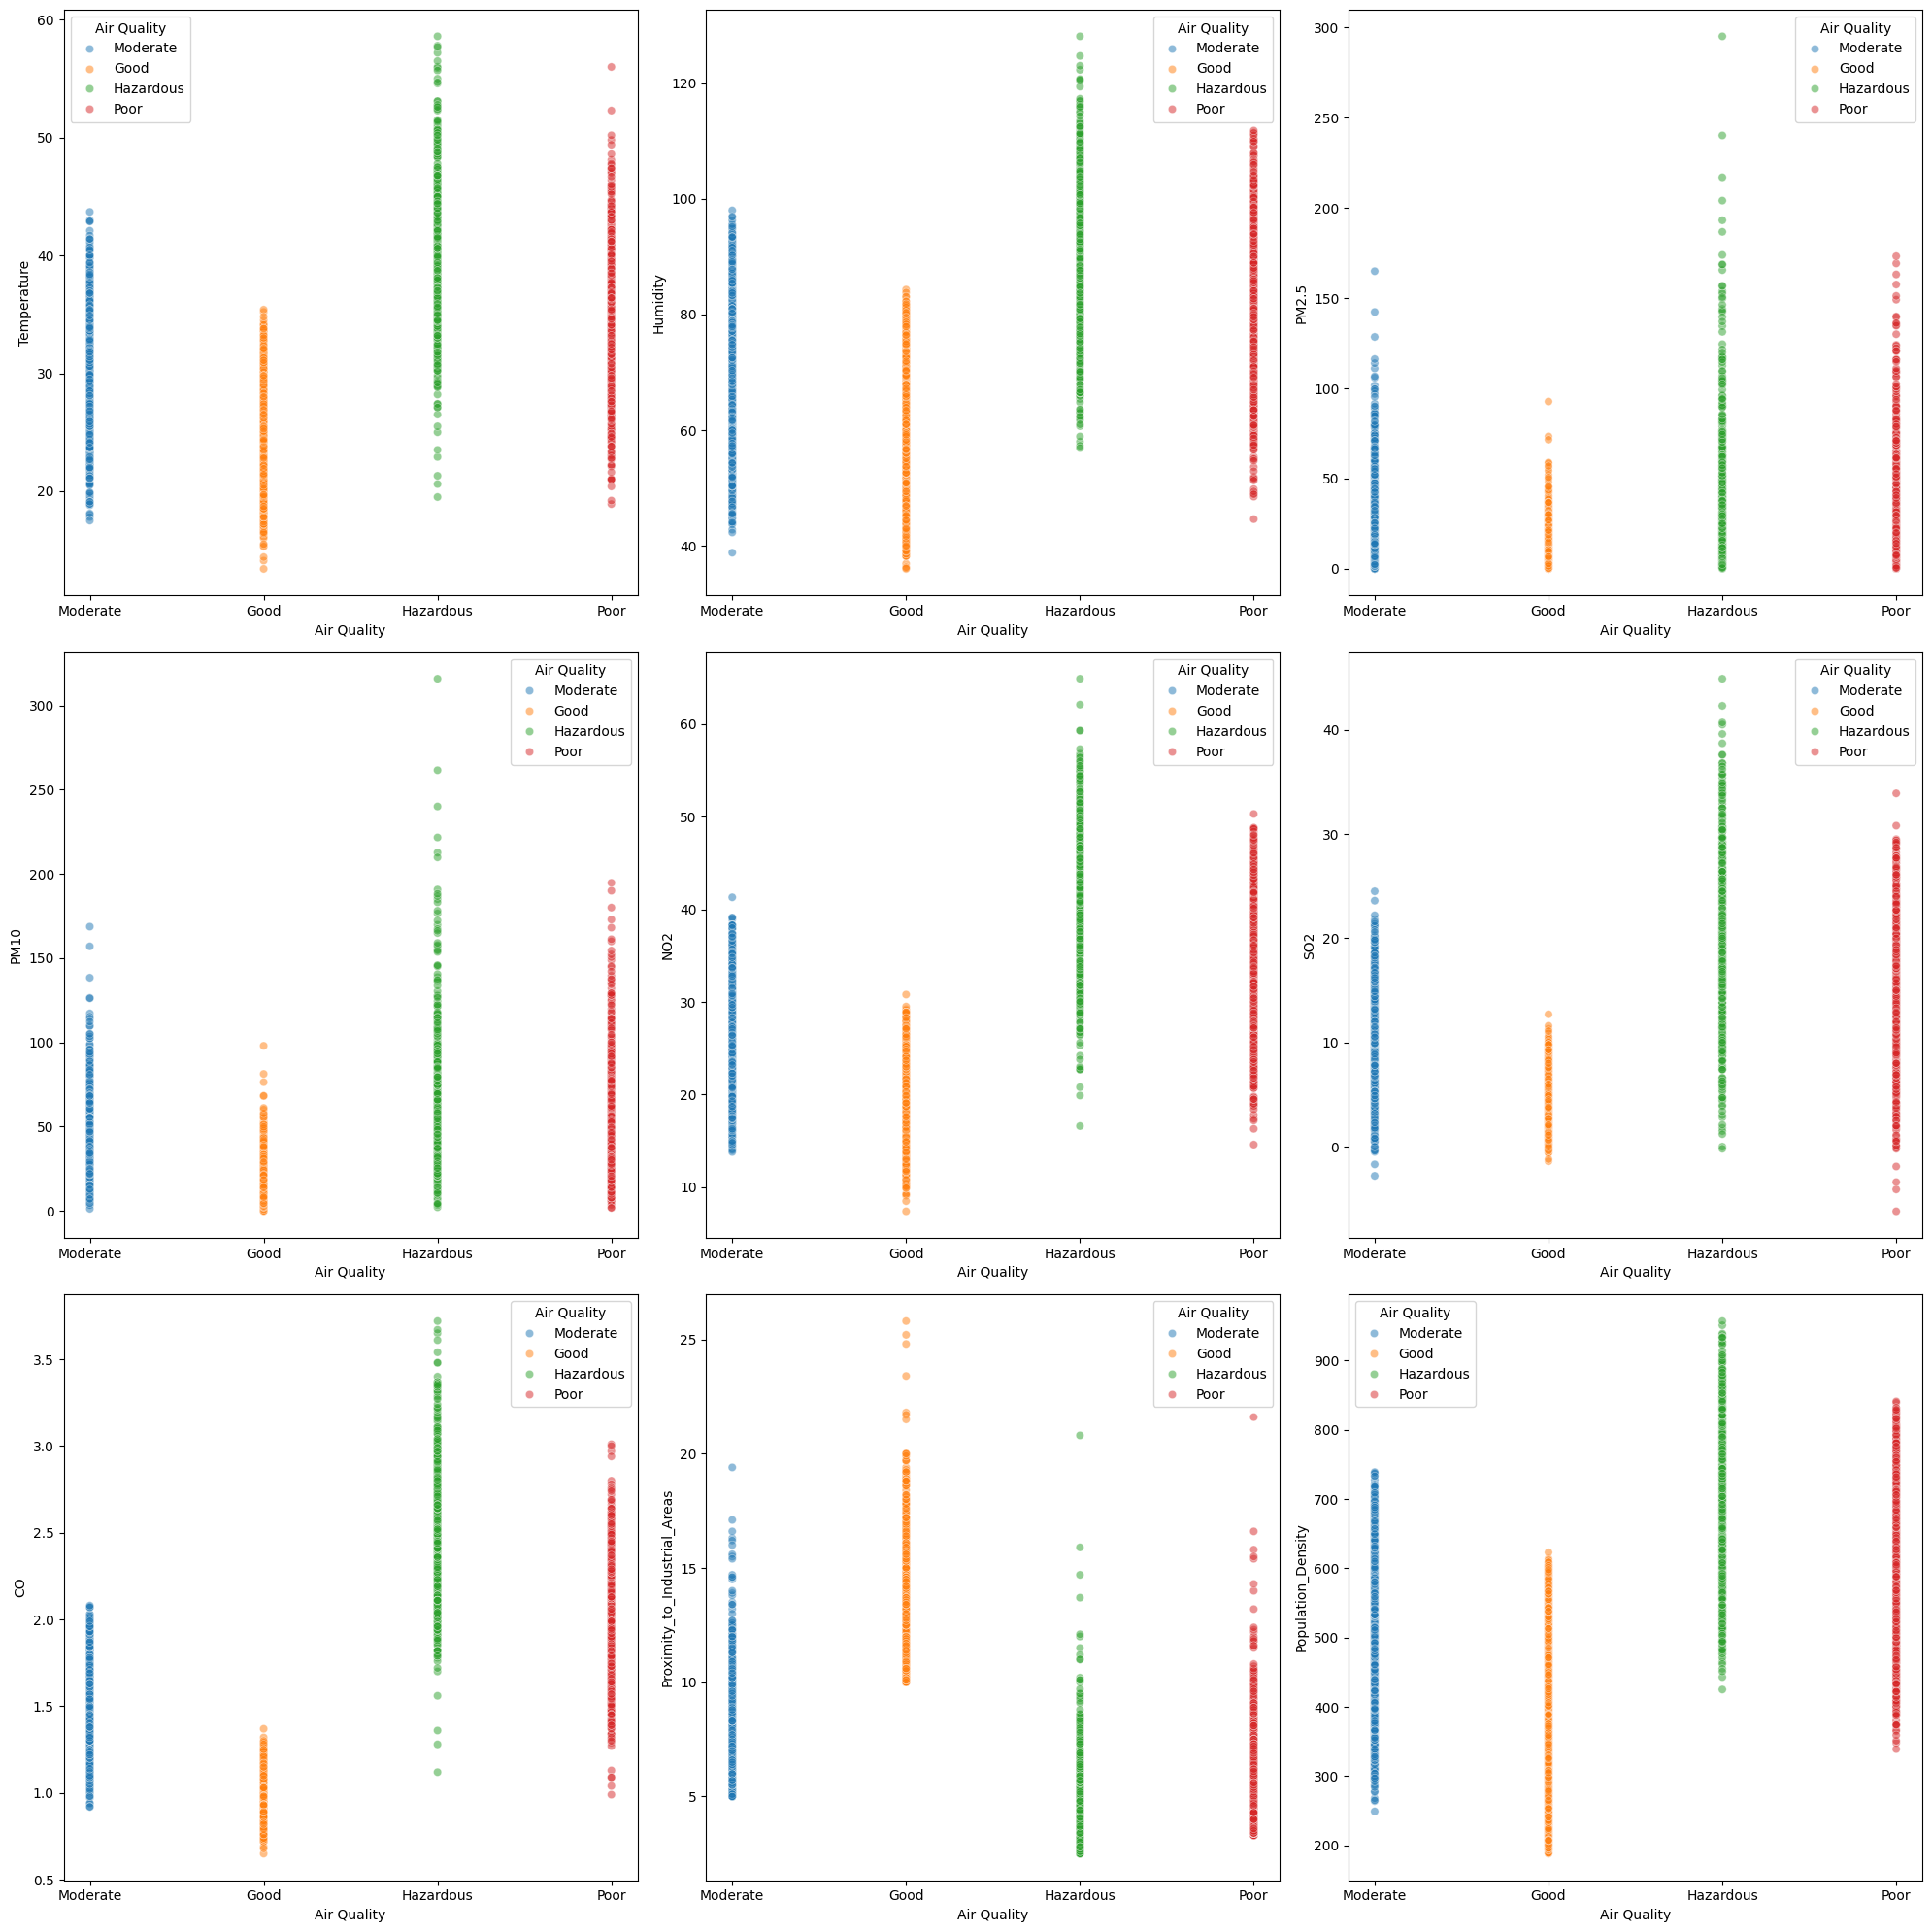

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.scatterplot(data=df, x='Air Quality', y=col, ax=ax[i],hue='Air Quality',alpha=0.5)
    i += 1
plt.tight_layout()
plt.show()

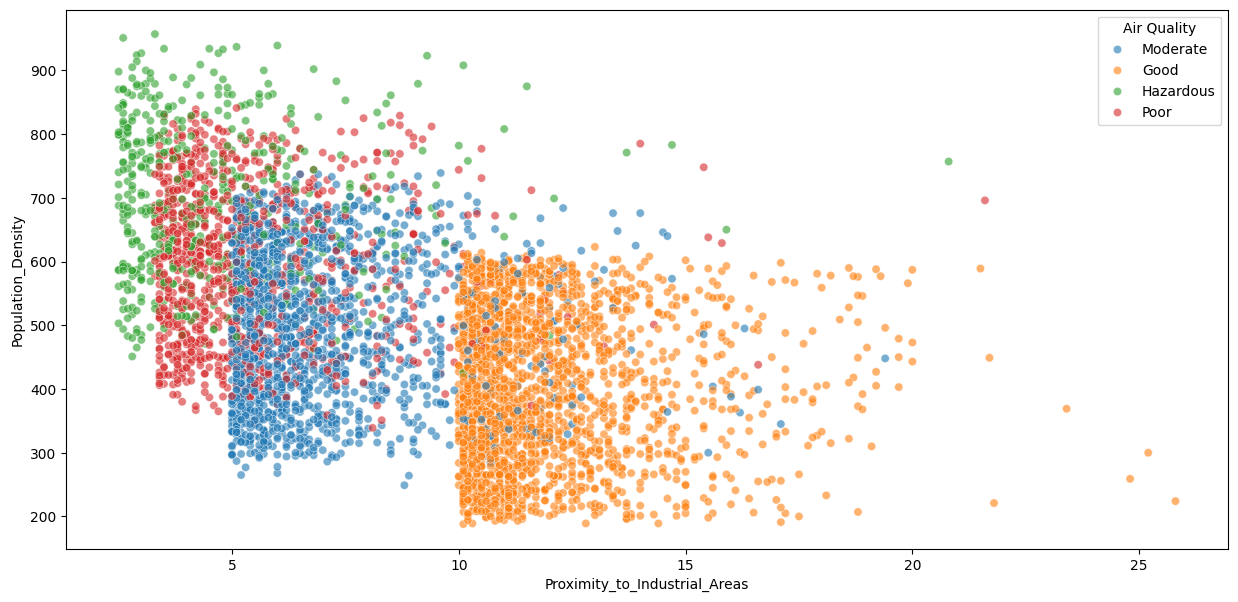

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)
plt.show()

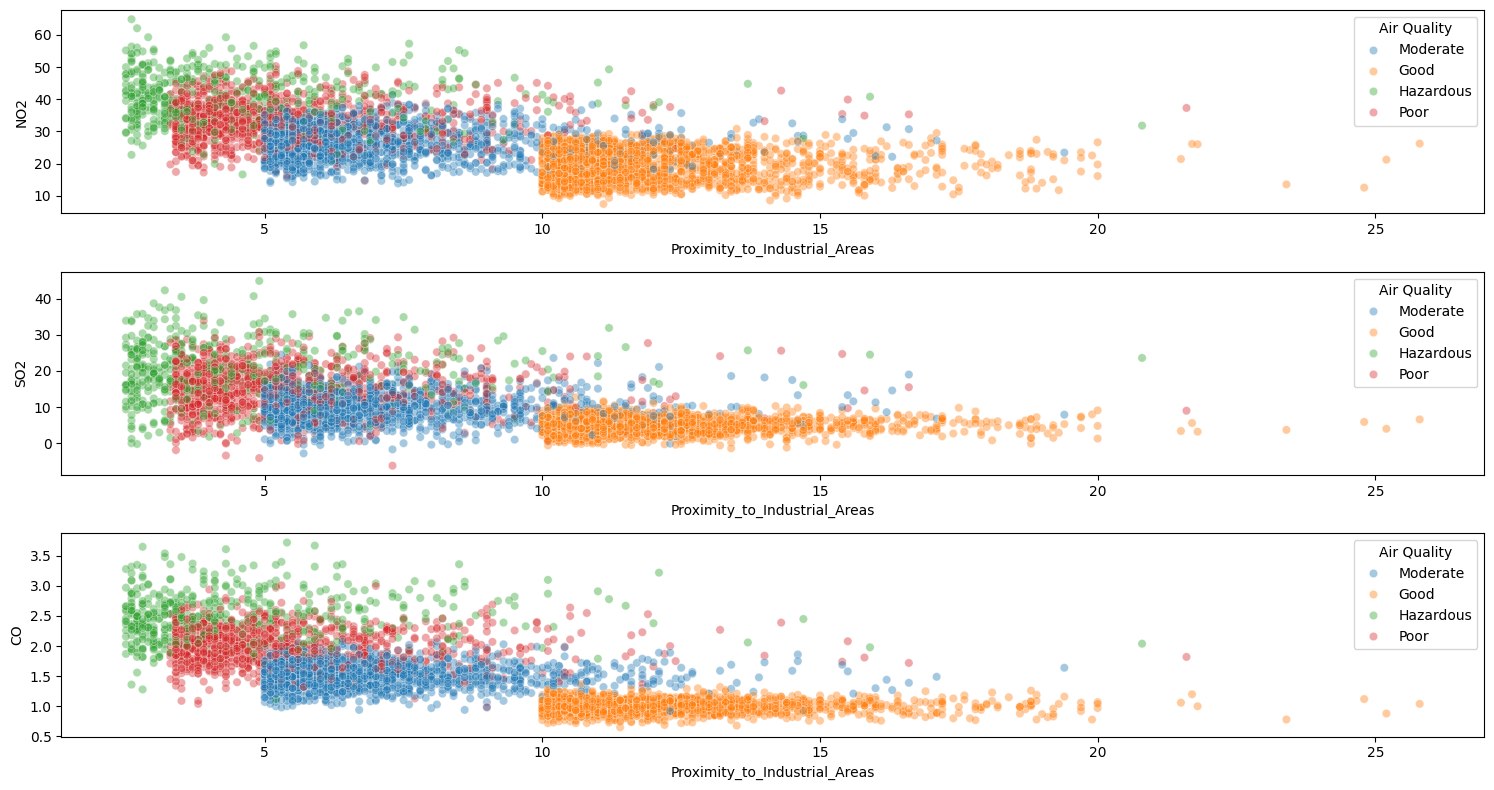

In [22]:
fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=df,y='NO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[0],hue='Air Quality')
sns.scatterplot(data=df,y='SO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[1],hue='Air Quality')
sns.scatterplot(data=df,y='CO',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[2],hue='Air Quality')
plt.tight_layout()
plt.show()

Предобработка данных

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [25]:
df.drop_duplicates(keep='first',inplace=True)

In [26]:
df.isnull().any()

,0
Temperature,False
Humidity,False
PM2.5,False
PM10,False
NO2,False
SO2,False
CO,False
Proximity_to_Industrial_Areas,False
Population_Density,False
Air Quality,False


In [27]:
le=LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])

Поработаем с выбросами

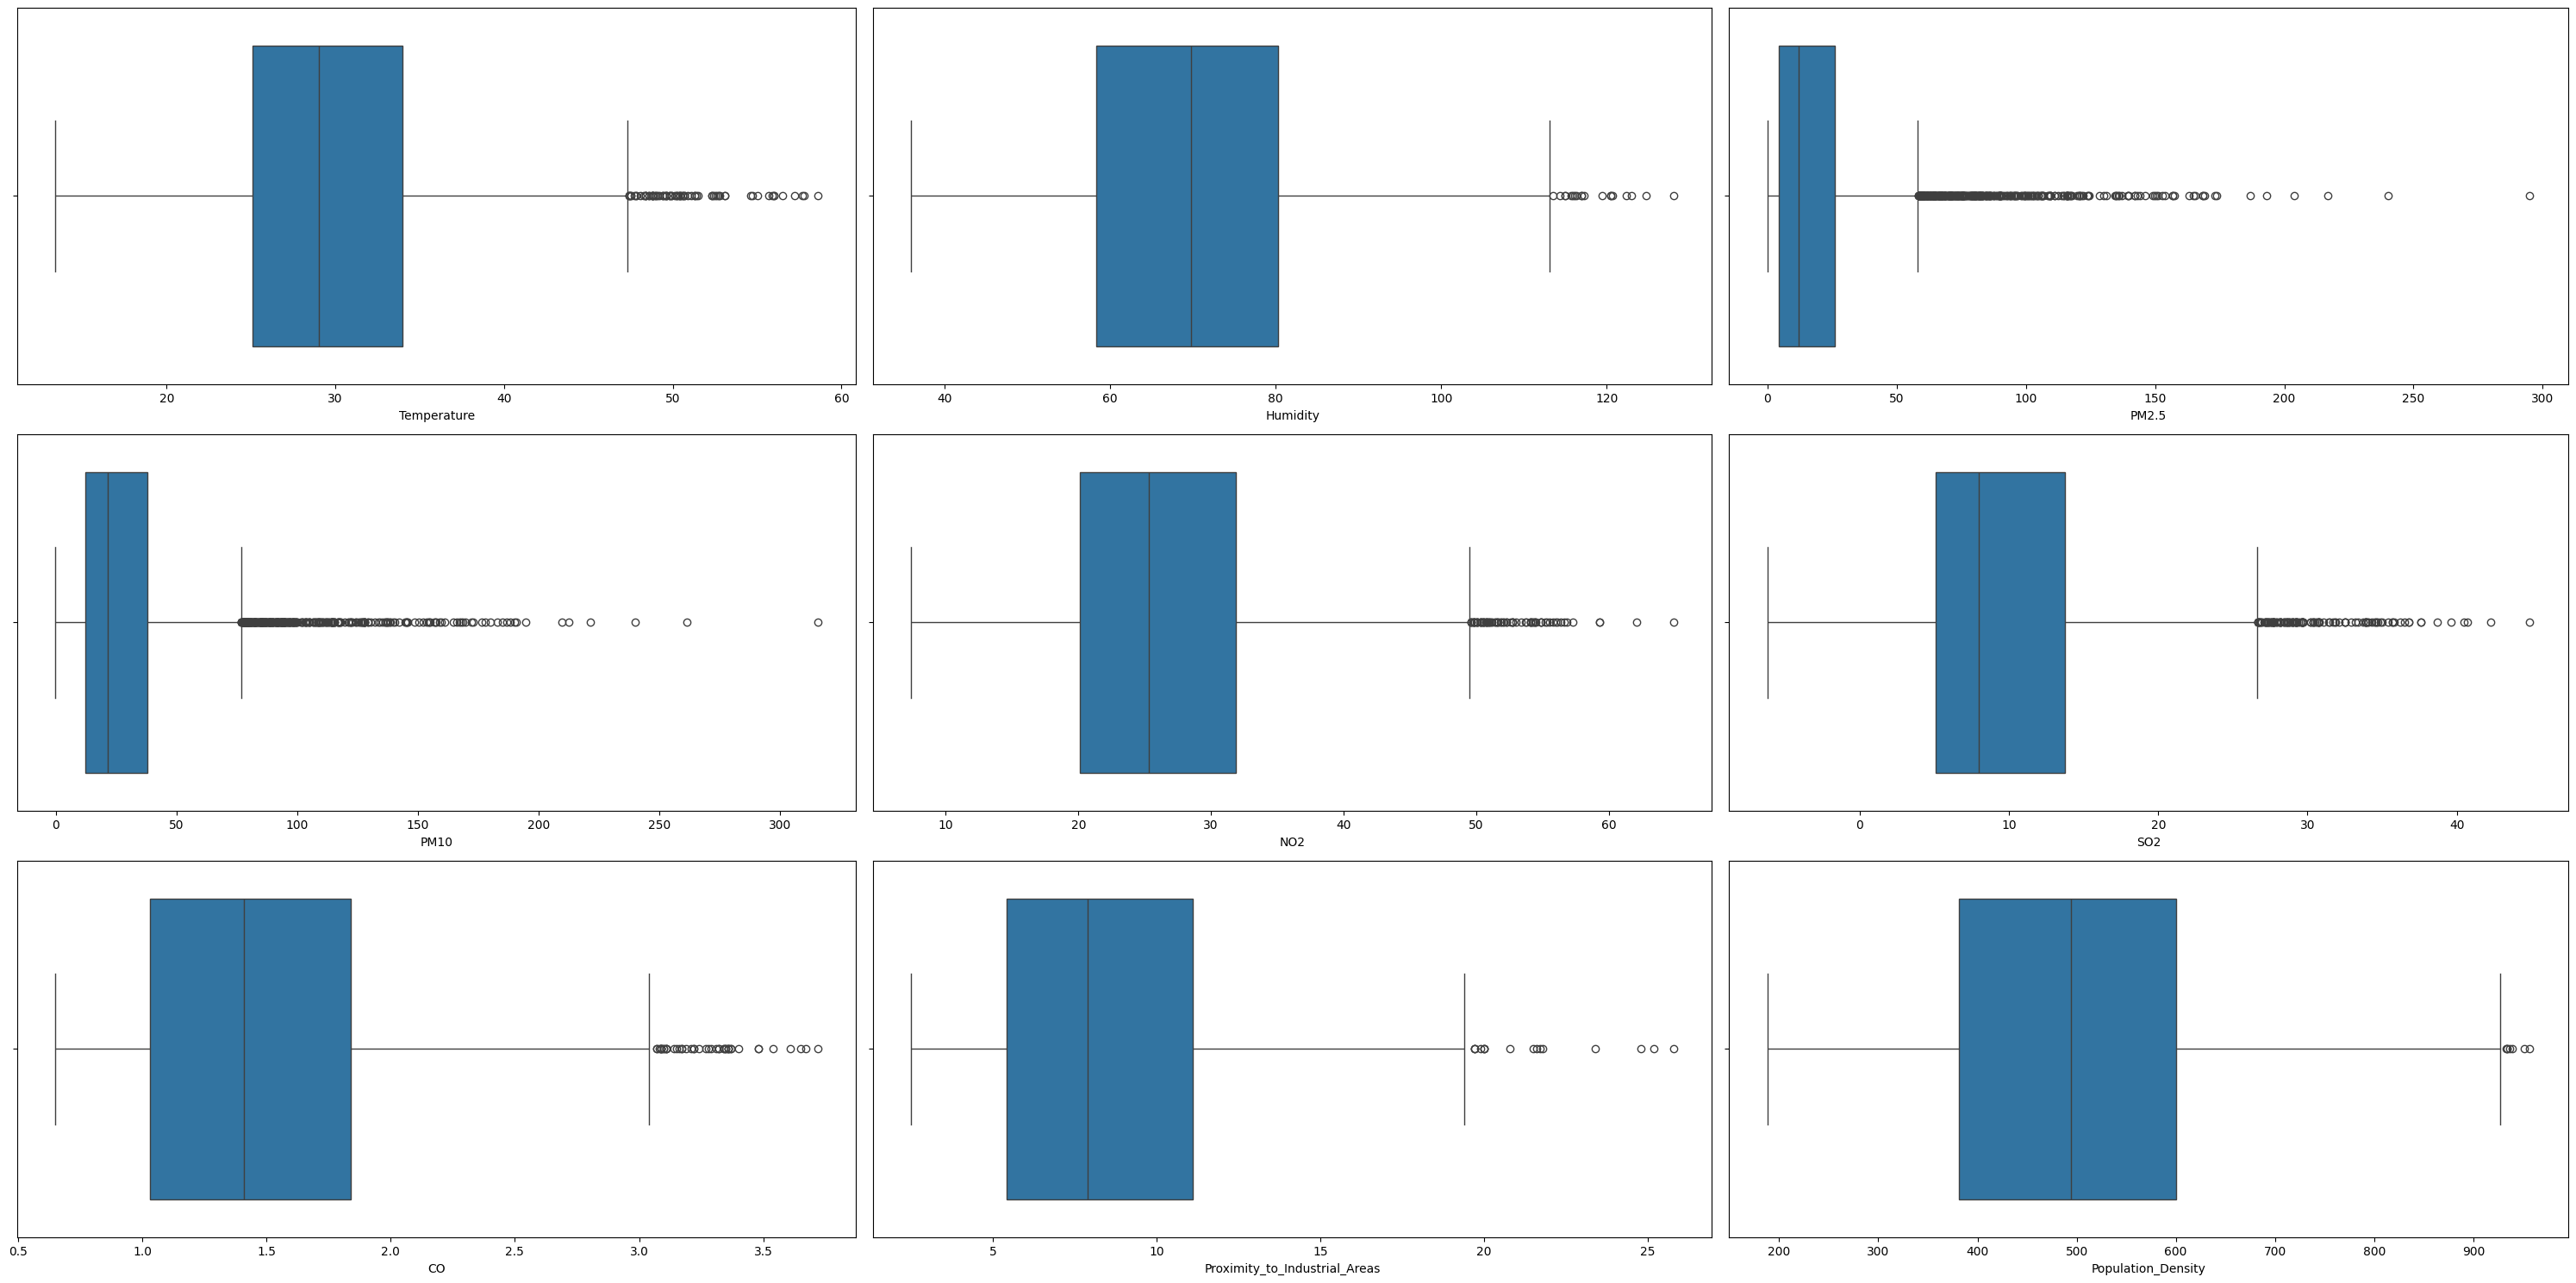

In [28]:
fig,ax=plt.subplots(3,3,figsize=(30,15))
ax=ax.flatten()
i=0

for col in df.columns:
    if col!='Air Quality' and i<9:
        sns.boxplot(data=df,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [30]:
import numpy as np
for col in df.drop(columns='Air Quality').columns:
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    df=df[(df[col]>=lb)&(df[col]<=ub)]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


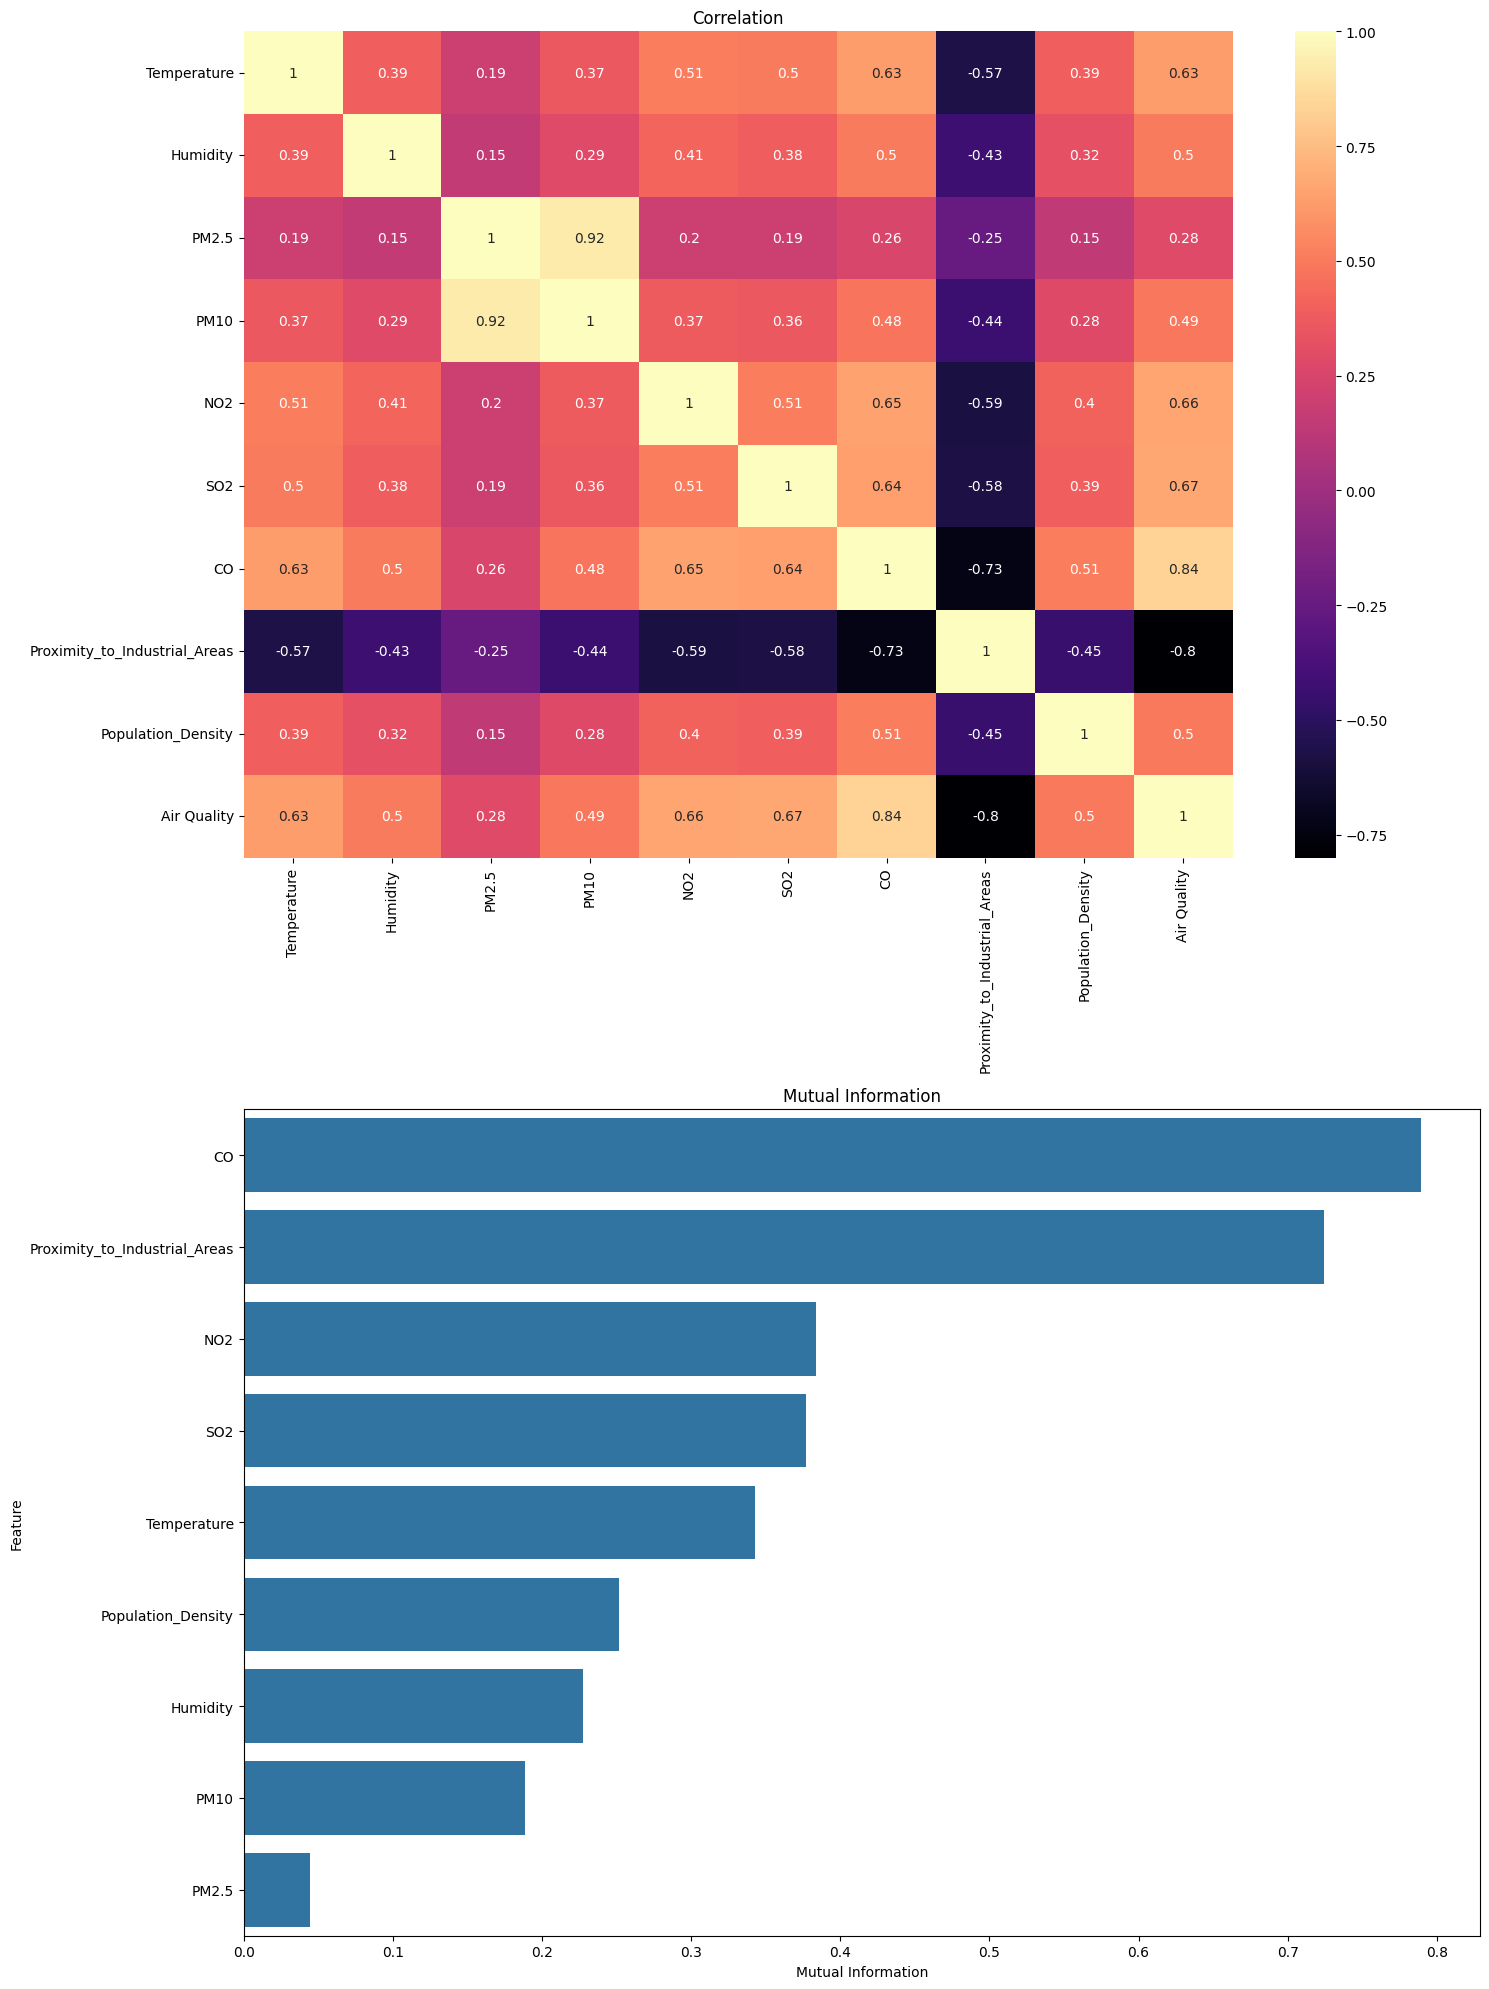

In [32]:
tdf=df.copy()
x=tdf.drop(columns='Air Quality')
y=tdf['Air Quality']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation
fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=df.drop(columns='Air Quality')
y=df['Air Quality']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
print(x_t.shape,y_t.shape,x_te.shape,y_te.shape)

(3118, 9) (3118,) (1040, 9) (1040,)


PCA + K-means

In [40]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [57]:
pca = PCA(n_components=3)
pca.fit(x)
PCA_df = pd.DataFrame(pca.transform(x), columns=(["col1","col2", "col3"]))
PCA_df

,col1,col2,col3
0,-151.322938,-4.156142,-0.494426
1,140.811263,-16.252246,10.453358
2,149.538280,11.702144,-4.126828
3,79.041218,-30.681203,-24.056577
4,-167.047775,-0.574572,9.723196
...,...,...,...
4153,72.199900,28.823911,-4.228886
4154,-191.790384,19.024941,-9.017942
4155,239.700986,-2.586676,21.975928
4156,-90.309299,9.155982,13.097323


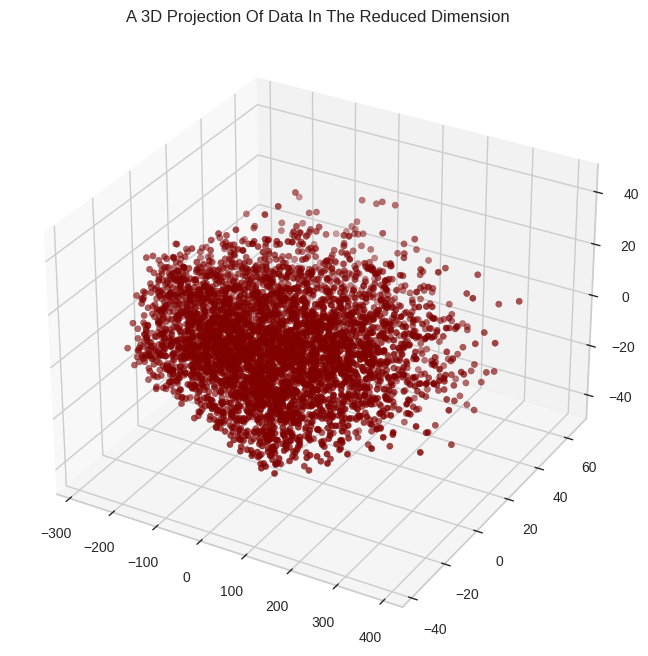

In [58]:
a = PCA_df["col1"]
b = PCA_df["col2"]
c = PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(a, b, c, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [59]:
kmeans = KMeans(n_clusters=4)
# fit model and predict clusters
classes = kmeans.fit_predict(PCA_df)
PCA_df["Clusters"] = classes

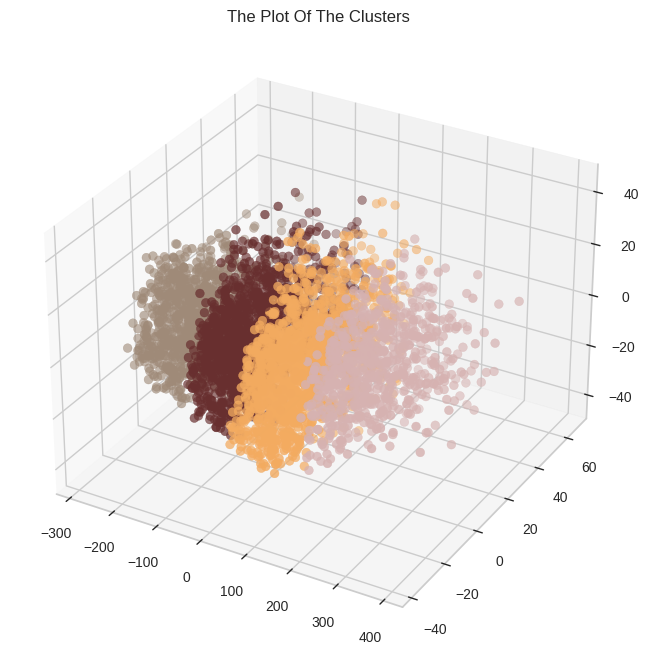

In [60]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(a, b, c, s=40, c=PCA_df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),
        'min_samples_leaf':list(np.arange(2,41)),'max_features':['sqrt','log2',None],'n_estimators':[400]}

nrf=RandomizedSearchCV(rf,param_distributions=params,random_state=20,cv=10,scoring='accuracy',n_jobs=-1)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

nrf=nrf.best_estimator_

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'criterion': 'gini'}
0.966326572677055


In [36]:
predt=nrf.predict(x_t)
pred=nrf.predict(x_te)

Метрики

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

Training Evalaution Metrics:
Accuracy:  0.9839640795381654
Precision:  0.9839640795381654
Recall:  0.9839640795381654
F1 Score:  0.9839640795381654

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1497
           1       1.00      0.72      0.84        76
           2       0.98      0.99      0.99      1023
           3       0.95      0.97      0.96       522

    accuracy                           0.98      3118
   macro avg       0.98      0.92      0.95      3118
weighted avg       0.98      0.98      0.98      3118


Confusion Matrix: 



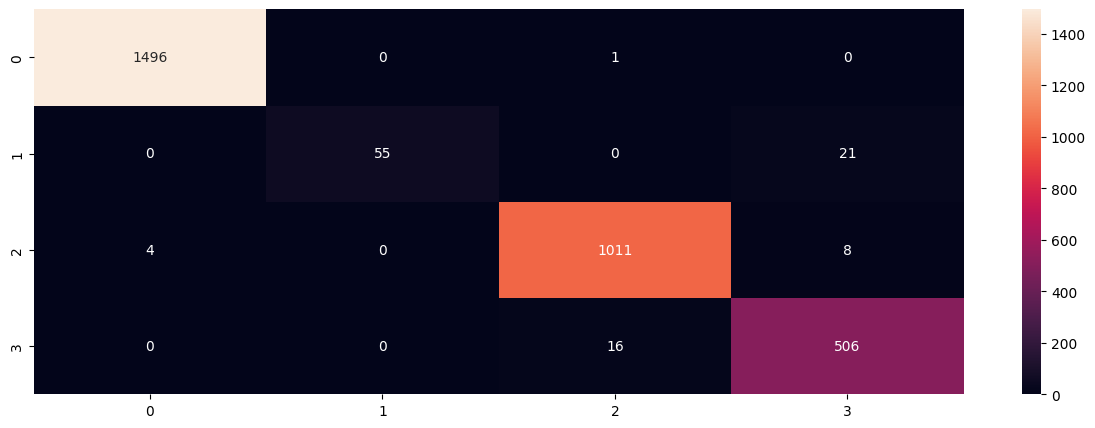

In [38]:
print("Training Evalaution Metrics:")
print("Accuracy: ",accuracy_score(y_t,predt))
print("Precision: ",precision_score(y_t,predt,average='micro'))
print("Recall: ",recall_score(y_t,predt,average='micro'))
print("F1 Score: ",f1_score(y_t,predt,average='micro'))
print("\nClassification Report: \n",classification_report(y_t,predt))
print("\nConfusion Matrix: \n")
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_t,predt),annot=True,fmt='d')
plt.show()

Testing Evalaution Metrics:
Accuracy:  0.9634615384615385
Precision:  0.9634615384615385
Recall:  0.9634615384615385
F1 Score:  0.9634615384615385

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       0.80      0.31      0.44        13
           2       0.94      0.98      0.96       366
           3       0.91      0.89      0.90       178

    accuracy                           0.96      1040
   macro avg       0.91      0.79      0.83      1040
weighted avg       0.96      0.96      0.96      1040


Confusion Matrix: 



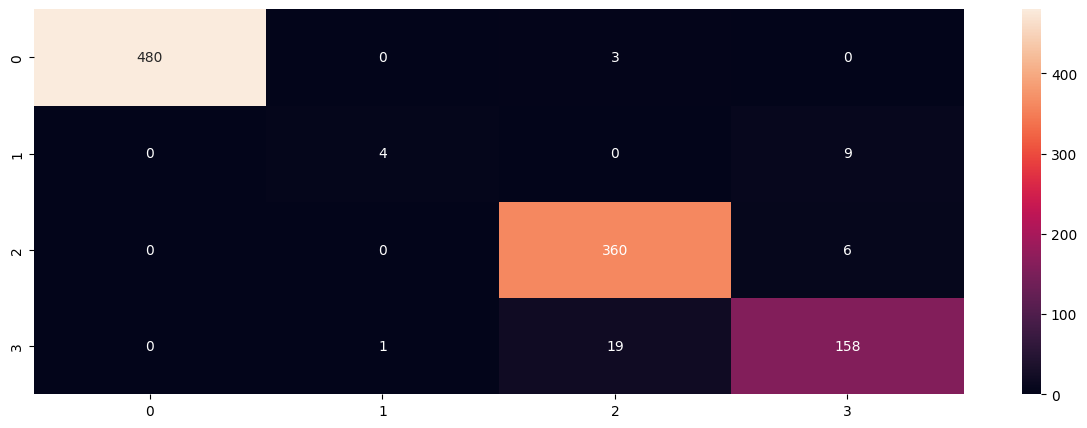

In [39]:
print("Testing Evalaution Metrics:")
print("Accuracy: ",accuracy_score(y_te,pred))
print("Precision: ",precision_score(y_te,pred,average='micro'))
print("Recall: ",recall_score(y_te,pred,average='micro'))
print("F1 Score: ",f1_score(y_te,pred,average='micro'))
print("\nClassification Report: \n",classification_report(y_te,pred))
print("\nConfusion Matrix: \n")
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_te,pred),annot=True,fmt='d')
plt.show()

**ML-systems design**

Датасет может применяться в экологии. Например, для предсказания качества воздуха.

**Преимущества:**

*  Высокая точность на реальных данных.
*  Быстрая скорость обучения.
*  Небольшой по размеру датасет.
*  Наличие разметки данных.

**Недостатки**:

*  Несбалансированность объектов по классам.